# Hypothesis Testing

Our story of statistical hypothesis testing begins with Dr. Ron Fisher and Dr. Muriel Bristol who were colleagues at a British research station right after World War I. The story begins with a meeting where Ron offered Muriel a cup tea. The results were surprising and changed the course of scientific research forever. [This Wikipedia article has details.](https://en.wikipedia.org/wiki/Lady_tasting_tea)

To calculate the probabilities involved, we need the formula for combinations from our [course notes](https://straightdraw.github.io/probstat/P2a.html#wrapping-up).

In [40]:
combin <- function(n, k) {
    return(factorial(n) / ( factorial(k)*factorial(n-k) )) }

## Binomial Distribution

While Ron Fisher used a slightly different approach, we can use the Binomial Distribution with a 50\% chance of success. For example, the probability of exactly six successes in eight trials for random guessing would be as follows:

In [42]:
x = 6    # Number of successes out of 8 trials
bin <- combin(8,x)*(1/2)^x*(1/2)^(8-x)     # Binomial distribution evaluation
bin

[1] 0.109375

## Empirical Probabilities

We can use the **rflip()** function in R to simulate flipping a fair coin 8 eight times which was Ron Fisher's null hypothesis:

- $H_0 : \pi = \frac{1}{2}$
- $H_a : \pi > \frac{1}{2}$

The formula for the **rflip()** function is pasted in below.

In [43]:
rflip <- function(n=1, prob=.5, quiet=FALSE, verbose = !quiet, summarize = FALSE, 
                  summarise = summarize) {
	if ( ( prob > 1 && is.integer(prob) ) ) {  
		# swap n and prob
		temp <- prob
		prob <- n
		n <- temp
	}
	if (summarise) {
	  heads <- rbinom(1, n, prob)
	  return(data.frame(n = n, heads = heads, tails = n - heads, prob = prob))
	} else {
	  r <- rbinom(n,1,prob)
	  result <- c('T','H')[ 1 + r ]
	  heads <- sum(r)
	  attr(heads,"n") <- n
	  attr(heads,"prob") <- prob 
	  attr(heads,"sequence") <- result
	  attr(heads,"verbose") <- verbose
	  class(heads) <- 'cointoss'
	  return(heads)
	}
}

## Testing

We will test the machinery to make sure we have everything working properly:

In [44]:
successes <- rflip(8, prob = 1/2, summarize = TRUE)
successes
successes[1,2]

n,heads,tails,prob
8,2,6,0.5


[1] 2

## Loop

I have copied the **for loop** from section 2 notebooks and tweaked the code for our example.

Times Number of Successes was Equal to 7 :  5 
  which gives p =  0.005

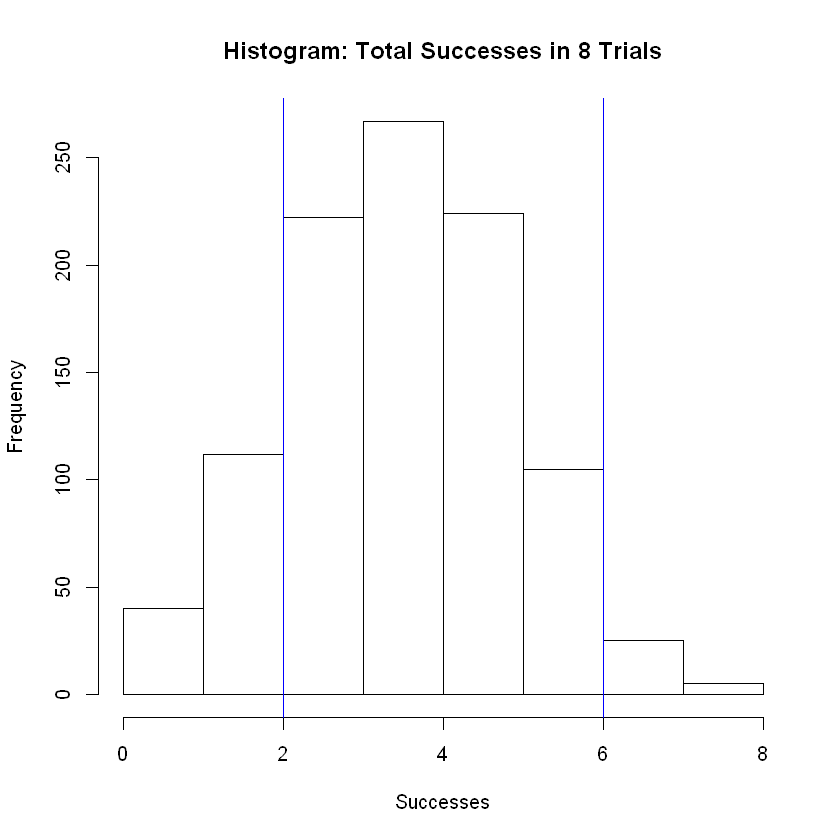

In [45]:
total_successes <- c()     #Empty vector to store number of successes in each trial

for (count in 1:1000){
    successes <- rflip(8, prob = 1/2, summarize = TRUE)
    total_successes[count] <- successes[1,2]
}

upper <- quantile(total_successes, prob = 0.95)
lower <- quantile(total_successes, prob = 0.05)
cat('Times Number of Successes was Equal to 7 : ', sum(total_successes==8), '\n  which gives p = ',sum(total_successes==8)/1000)
hist(total_successes, main = 'Histogram: Total Successes in 8 Trials', xlab = 'Successes')
abline( v = lower, col="blue")
abline(v = upper, col="blue")

## Task

Let's simulate the situation several times and verify the theoretical probabilities above.